<a href="https://colab.research.google.com/github/luciansantana/olympic-games/blob/master/Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O banco de dados utilizado neste notebook, se trata de informações dos atletas que disputaram os Jogos Olímpicos durante anos de 1986 a 2016.

# Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 


# Lendo e conhecendo o banco de dados

In [0]:
athlets = pd.read_csv("https://raw.githubusercontent.com/luciansantana/olympic-games/master/athlete_events.csv?token=AO27OWE4WTSMJ7U6ALCDJXC63LZV4")
athlets.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Temos então uma tabela em que mostra total de medalhas conquistadas por atleta em cada nação.

In [0]:
medalist = athlets.dropna(subset = ["Medal"])
medalist['Team'].value_counts()

United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
                 ... 
Rostock             1
Bermuda             1
Turquoise-1         1
Sudan               1
Nepal               1
Name: Team, Length: 498, dtype: int64

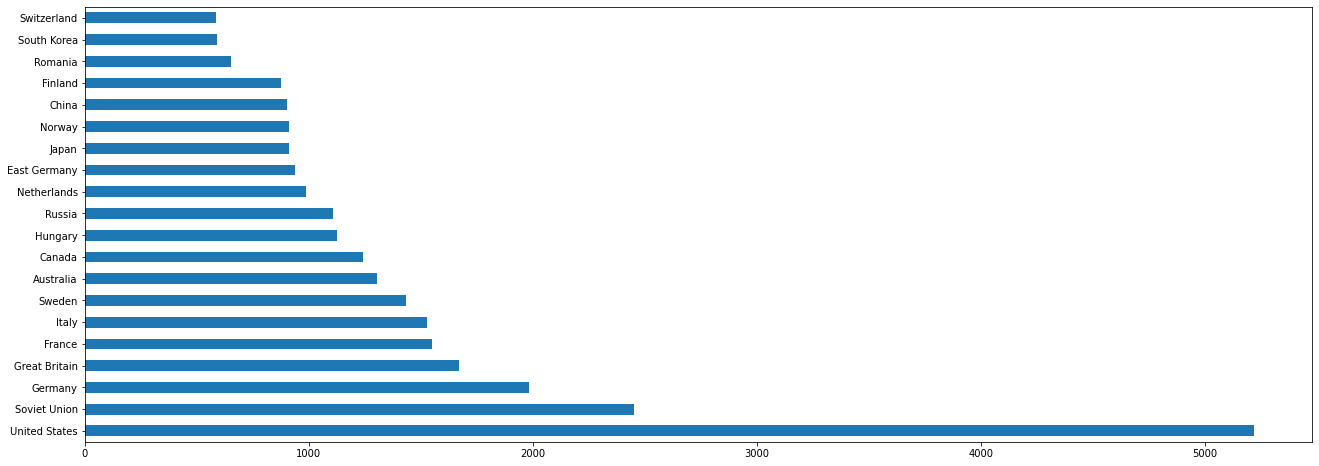

In [0]:
medalist['Team'].value_counts()[:20].plot(kind ='barh',figsize = (22,8))

Vale destacar a soberania da nação americana diantes os outros. Outro ressalva em função com a unidade fedarativa Rússia, por questões politicas e historicas, a nação disputou em momentos diferentes da história com dois nomes em vigencia: Russia(RUS) e Soviet Unian(URS).

Houve então, um agrupamento dos atletas que levam o nome de Soviet Union e Russia, para Russia Federation

In [0]:
athlets['Team'] = athlets['Team'].replace(to_replace = ['Soviet Union','Russia'],value = 'Russia Federation')
athlets['NOC'] = athlets['NOC'].replace(to_replace = ['URS'],value = 'RUS')


In [0]:
medalist['Team'].value_counts()

United States        5219
Russia Federation    3561
Germany              1984
Great Britain        1673
France               1550
                     ... 
Clearwater              1
Cicely-1                1
Sudan                   1
England                 1
Senegal                 1
Name: Team, Length: 497, dtype: int64

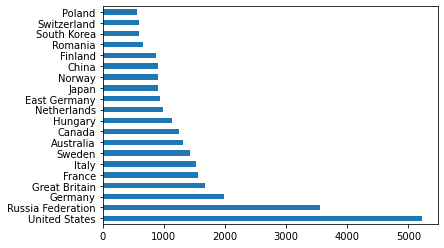

In [0]:
medalist['Team'].value_counts()[:20].plot(kind = 'barh',figsize = (22,8))

Com isso a União Federativa da Rússia chegando a 3561 atletas com medalhas conquistadas, 1658 a menos que o Estados Unidos e 1577 a mais que a Alemanha 

In [0]:
athlets['City'].value_counts()[:20]

London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Beijing           13602
Barcelona         12977
Los Angeles       12423
Seoul             12037
Munich            10304
Montreal           8641
Mexico City        8588
Helsinki           8270
Roma               8119
Tokyo              7702
Moskva             7191
Paris              7169
Berlin             6506
Amsterdam          4992
Sochi              4891
Name: City, dtype: int64

 A cidade em que mais foi palco de atrações olímpicas foi Londres (Inglaterra), e em seguida Athina (Grécia) e Sidney (Austrália)

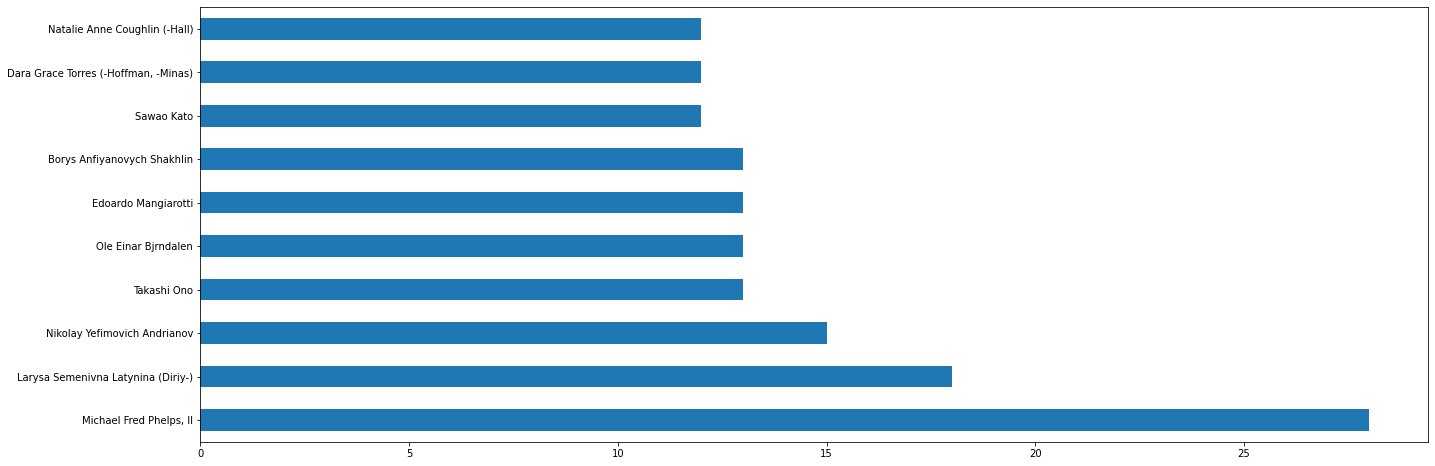

In [0]:
medalist['Name'].value_counts()[:10].plot(kind = 'barh',figsize = (22,8))

O atleta com mais medalhas na historia das olimpiadas, é Michael Fred Phelps, nadador que até então se encontra aposentado. Disputou as olimpiadas entre as edições de 2000 a 2016

In [0]:
phelps = athlets[athlets['Name']=='Michael Fred Phelps, II']
phelps['Medal'].value_counts()

Gold      23
Silver     3
Bronze     2
Name: Medal, dtype: int64

Michael Phelps disputou 30 medalhas, e conquistou 28 medalhas, o que mostra acaba mostrando a eficiencia do atleta americano. Das medalhas conquistadas, 23 são de ouro, o que representa o total de 82.14%.

# Análise histórica

Como os dados estão por atletas, foi preciso criar funções que conseguissem captar a quantidade de medalhas conquistadas pela nação, mas nestas funções foi constatado a quantidade de medalhas por eventos, pois pegando os dados apenas por atleta, dois atletas diferentes poderiam ganhar a mesma medalha devido aos esportes coletivos. Com isso vamos trabalhar a partir de agora com os dados conquistados por eventos. Exemplo, Event: 'Bobsleigh Men's Four'

In [0]:
def medalseason(noc):
  data0 = athlets[athlets['NOC']==noc]
  datax = athlets[athlets['Season']=='Summer']
  #datax = athlets
  data0 = data0[data0['Season']=='Summer']
  data0_med = data0.dropna(subset = ['Medal'])
  year = datax.Year.unique()
  year = sorted(year)
  data2 = []
  for i in year:
    data1 = data0_med[data0_med['Year']==i]
    medalhas = data1.Medal.unique()
    medal2 = []
    for j in medalhas:
      medal0 = data1[data1['Medal']==j]
      medal1 = medal0.Event.unique().shape[0]
      medal2.append(medal1)
    soma = sum(medal2)
    data2.append(soma)
  nomes = [noc]*len(year)
  obj = {'Year': year,'Medals' : data2,'NOC': [noc]*len(year)}
  data3 = pd.DataFrame(obj)

  return data3
def medalacum(noc):
  data0 = medalseason(noc)
  tamanho = range(1,data0.shape[0])
  #tamanho = range(1,len(data0))
  data1 = data0['Medals']
  for j in tamanho:
     #data0.iloc[j][1] = data0.iloc[j][1]+data0.iloc[j-1][1]
     data1[j]= data1[j]+data1[j-1]
  data0['Medals']=data1
  return data0

def geralacum():
  noc = athlets.NOC.unique()
  noc = sorted(noc)
  anos = athlets[athlets['Season']=='Summer']
  anos = anos.Year.unique()
  anos = sorted(anos)
  data1 = pd.DataFrame()
  for i in noc:
    data = medalacum(i)
    data = pd.DataFrame(data)
    data1 = pd.concat([data1,data],axis = 0)
  #data1.columns = noc
  #data1.index = anos
  return data1
def geralseason():
  noc = athlets.NOC.unique()
  noc = sorted(noc)
  anos = athlets[athlets['Season']=='Summer']
  anos = anos.Year.unique()
  anos = sorted(anos)
  data1 = pd.DataFrame()
  for i in noc:
    data = medalseason(i)
    data = pd.DataFrame(data)
    data1 = pd.concat([data1,data],axis = 0)
  #data1.columns = noc
  #data1.index = anos
  return data1

In [0]:
tabelacum = geralacum()
tabelasea = geralseason()

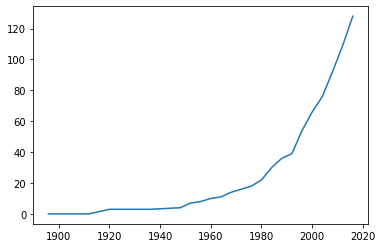

In [23]:
bra = tabelacum[tabelacum['NOC']=='BRA']
bra = bra.drop(['NOC'],axis = 1)
bra_index = bra.set_index(['Year'])
plt.plot(bra_index)

In [0]:
a = pd.read_excel("https://github.com/luciansantana/olympic-games/blob/master/NYGDPPCAPKDBRA.xls?raw=true")

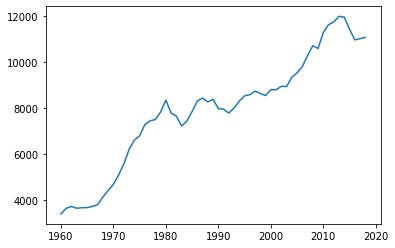

In [43]:
linha = range(10,68)
#for i in linha:
#  print(a.loc[i])
#a = a.loc[10:68]
a.columns = ['Year','PIB per capita']
brazil_index = a.set_index(['Year'])
plt.plot(brazil_index)
#plt.plot(bra_index)

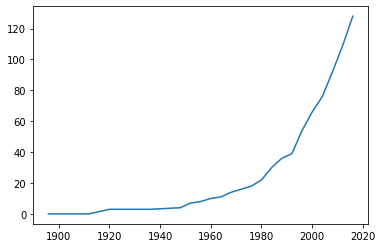

In [45]:
plt.plot(bra_index)

In [51]:
brazil_index.iloc[1][0]

3660.39149911126

In [68]:
sequencia = range(0,60,4)
valor = []
for i in sequencia:
  valor1 = brazil_index.iloc[i][0]
  valor.append(valor1)
print(valor)
len(valor)

[3417.35244190971, 3685.49289177482, 4147.38172722123, 5587.88625565948, 7296.34748425015, 8349.48782019185, 7442.97241093524, 8276.32686747308, 7791.75742548499, 8591.01470912416, 8803.15252917931, 9346.03934316368, 10710.8722205603, 11745.7759262897, 10965.9742614391]


15

In [77]:
bra_ajustado = bra_index[bra_index.index >=1960]
bra_ajustado['PIB per capita'] = valor
#bra_ajustado.plot.scatter(x = 'Medals',y = 'PIB per capita')
bra_ajustado.corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Medals,PIB per capita
Medals,1.000000,0.874024
PIB per capita,0.874024,1.000000


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 

from time import time, sleep

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1960 to 2016
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Medals          15 non-null     int64  
 1   PIB per capita  15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 360.0 bytes


Text(0, 0.5, 'Medals')

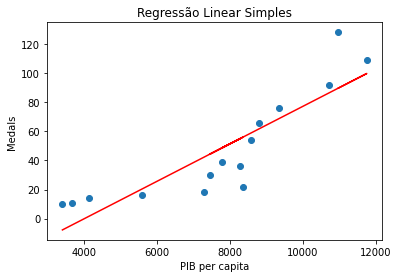

In [95]:
X = bra_ajustado['PIB per capita'].values
sc = StandardScaler()
X = X.reshape(-1,1)
y = bra_ajustado['Medals'].values
regressor = LinearRegression()
regressor.fit(X,y)
regressor.coef_
regressor.intercept_
plt.scatter(X,y)
plt.plot(X,regressor.predict(X),color = 'red')
plt.title('Regressão Linear Simples')
plt.xlabel('PIB per capita')
plt.ylabel('Medals')